In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import datetime

In [35]:
pip install xlrd >= 2.0.1

Note: you may need to restart the kernel to use updated packages.


In [36]:
df = pd.read_excel(r"D:\certisured ML\Machine Learning\decision tree\cars.xls")

In [37]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [38]:
df.shape

(804, 12)

In [39]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [40]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [41]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [43]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [44]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [45]:
df.drop(columns=['Make', 'Model', 'Trim', 'Type','Cruise', 'Sound', 'Leather'],inplace=True)

Price


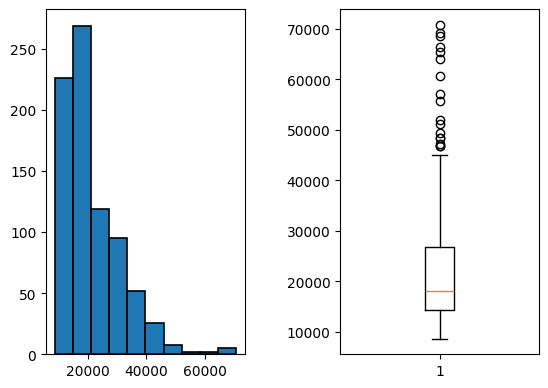

Mileage


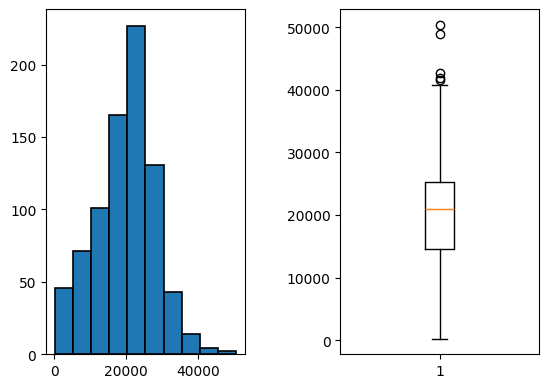

Cylinder


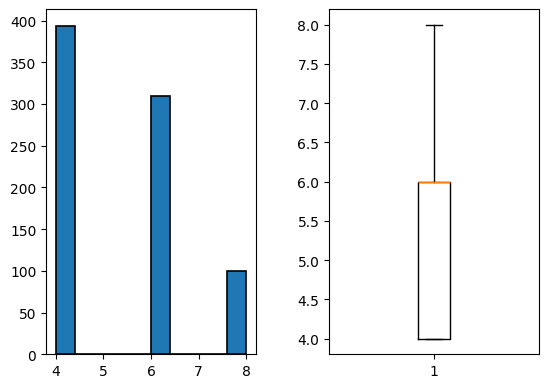

Liter


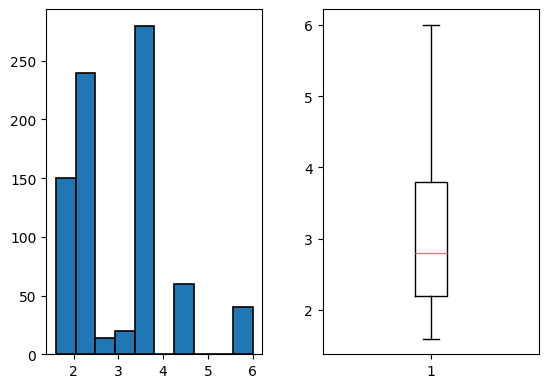

Doors


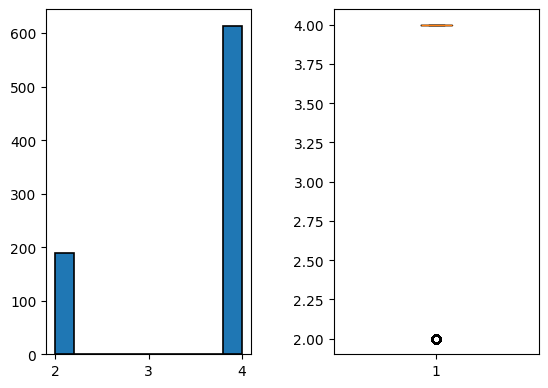

In [46]:
for i in df:
    print(i)

    plt.figure()
    plt.subplot(1,2,1)
    df[i].hist(grid=False , edgecolor= 'black',linewidth=1.2)

    plt.subplot(1,2,2)
    plt.boxplot(df[i])
    plt.tight_layout(pad=4,w_pad=3,h_pad=3)
    plt.show()

In [47]:
df.head()

,Price,Mileage,Cylinder,Liter,Doors
0,17314.103129,8221,6,3.1,4
1,17542.036083,9135,6,3.1,4
2,16218.847862,13196,6,3.1,4
3,16336.913140,16342,6,3.1,4
4,16339.170324,19832,6,3.1,4


<Axes: >

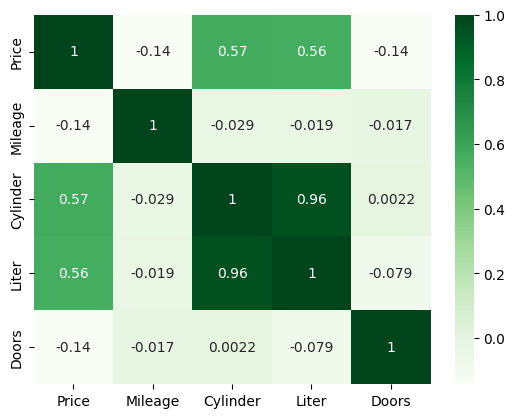

In [48]:
corr = df.corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='Greens')

In [49]:
df.groupby('Liter')['Price'].count().sort_values(ascending=True)

Liter
2.5      4
2.8     10
3.0     10
3.1     10
3.4     10
5.7     20
6.0     20
1.8     30
3.6     30
2.3     50
1.6     60
2.0     60
4.6     60
3.5     80
3.8    160
2.2    190
Name: Price, dtype: int64

In [50]:
df.columns

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors'], dtype='object')

In [51]:
df['Mileage'] = df['Mileage']/1000

In [52]:
df['Mileage'].max()

np.float64(50.387)

In [53]:
df['Price (K)'] = df['Price'].rename('Price (K)')

In [54]:
df['Price (K)'] = df['Price']/1000

In [55]:
df

,Price,Mileage,Cylinder,Liter,Doors,Price (K)
0,17314.103129,8.221,6,3.1,4,17.314103
1,17542.036083,9.135,6,3.1,4,17.542036
2,16218.847862,13.196,6,3.1,4,16.218848
3,16336.913140,16.342,6,3.1,4,16.336913
4,16339.170324,19.832,6,3.1,4,16.339170
...,...,...,...,...,...,...
799,16507.070267,16.229,6,3.0,4,16.507070
800,16175.957604,19.095,6,3.0,4,16.175958
801,15731.132897,20.484,6,3.0,4,15.731133
802,15118.893228,25.979,6,3.0,4,15.118893


In [56]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors']]
y = df['Price (K)']

In [57]:
scale = StandardScaler()
x = scale.fit_transform(X)
x

array([[-1.41748516,  0.52741047,  0.05673638,  0.55627894],
       [-1.30590228,  0.52741047,  0.05673638,  0.55627894],
       [-0.81012759,  0.52741047,  0.05673638,  0.55627894],
       ...,
       [ 0.07960546,  0.52741047, -0.03377166,  0.55627894],
       [ 0.75044563,  0.52741047, -0.03377166,  0.55627894],
       [ 1.93256489,  0.52741047, -0.03377166,  0.55627894]],
      shape=(804, 4))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
X.shape

(804, 4)

In [60]:
X_test.shape

(161, 4)

In [61]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)
y_pred

array([16.53773805, 14.6126804 , 14.42329328, 25.0087276 , 27.34257831,
       13.04926156, 13.55569686, 14.78982905, 13.62585828, 16.16002799,
       22.76808289, 15.31800796, 18.39586284, 24.2932316 , 15.48551466,
       23.38201116, 23.58359916, 31.53646947, 18.51926782, 20.17411868,
       21.05952668, 22.67875361, 21.7918301 , 14.97821199, 21.74708584,
       23.95945842, 25.61165203, 21.45696472, 15.20671585, 22.34898366,
       14.4145955 , 25.40234967, 16.73247906, 17.08468393, 25.06598561,
       24.05595876, 17.96370658, 23.6495213 , 23.26679823, 15.46768065,
       22.91935351, 17.03491059, 16.84122346, 23.01330613, 18.11768414,
       17.73771212, 21.12027658, 21.97112558, 23.31688518, 22.32366574,
       25.35187306, 28.91164148, 13.35404887, 20.28117804, 21.803751  ,
       17.72438054, 17.83441001, 30.61217516, 14.5588599 , 14.39986933,
       14.51236409, 15.54046099, 34.55774178, 20.36413242, 20.11048109,
       17.63266277, 14.37924595, 22.03672926, 24.61249783, 36.45

In [63]:
rmse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('rmse:', rmse)
print('r2_score:', r2)

rmse: 60.583472969554904
r2_score: 0.2361650012082357


In [64]:
#
print(f'coefficient:{model.coef_}')
print(f'intercept: {model.intercept_}')

coefficient:[-0.15923223  4.9908793  -1.08201103 -1.88613612]
intercept: 8.179072791901827


In [65]:
X_test.max()

Mileage     50.387
Cylinder     8.000
Liter        6.000
Doors        4.000
dtype: float64

In [66]:
new = [[40,6,5,3]]
y_pred = model.predict(new)
y_pred

c:\Users\POOJA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.68659592])